#Упражнение 1

В данном упраднении на датасете Breast cancer wisconsin следует продемонстрировать работу моделей градиентного бустинга, xgboost, lightgbm и catboost.

Импортируйте необходимые библиотеки указанные в лекции.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

Загрузите датасет. Разделите датасет на тестовую и обучающую выборки

In [2]:
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Определите параметры

In [3]:
params = {'n_estimators': 100,
          'max_depth': 2,
          'min_samples_split': 6,
          'learning_rate': 0.01,
          'loss': 'ls'}

Обучите модель градиентного бустинга

In [4]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse_reg = mse(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_reg))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 0.0669


Постройте график качества обучения

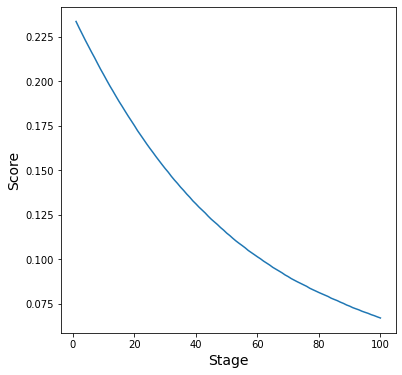

In [58]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.plot(np.arange(1, 101), test_score)
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

По аналогии обучите модели xgboost, catboost и lightdm

In [8]:
import xgboost
import lightgbm
!pip install catboost
import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [60]:
xg_reg = xgboost.XGBRegressor(learning_rate = 0.1, max_depth = 5, alpha = 10, min_child_weight=9, n_estimators = 10)

lgg_reg = lightgbm.LGBMRegressor(n_estimators=2000, learning_rate=0.1, max_depth=-1, num_leaves=100, min_child_weight=7, n_jobs=-1) 

cat_reg = catboost.CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=6, min_data_in_leaf=7, verbose=0)

xg_reg.fit(X_train, y_train)
lgg_reg.fit(X_train, y_train)
cat_reg.fit(X_train, y_train)

mse_xg = mse(y_test, xg_reg.predict(X_test))
mse_lgg = mse(y_test, lgg_reg.predict(X_test))
mse_cat = mse(y_test, cat_reg.predict(X_test))

print("MSE для xgboost: {:.4f}".format(mse_xg))
print("MSE для lightgbm: {:.4f}".format(mse_lgg))
print("MSE для catboost: {:.4f}".format(mse_cat))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_reg))

[14:57:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE для xgboost: 0.0577
MSE для lightgbm: 0.0309
MSE для catboost: 0.0221
The mean squared error (MSE) on test set: 0.0669


_Встроенный метод staged-predict только для catboost (у двух других встроенного нет). Для модуля xgboost воспользуемся исходным кодом для отображения лосса._ 

In [61]:
num_iterations = 200
cat_reg_n = catboost.CatBoostRegressor(iterations=num_iterations, learning_rate=0.1, depth=6, min_data_in_leaf=7, verbose=0).fit(X_train, y_train)
y_pred_n = cat_reg_n.predict(X_test)

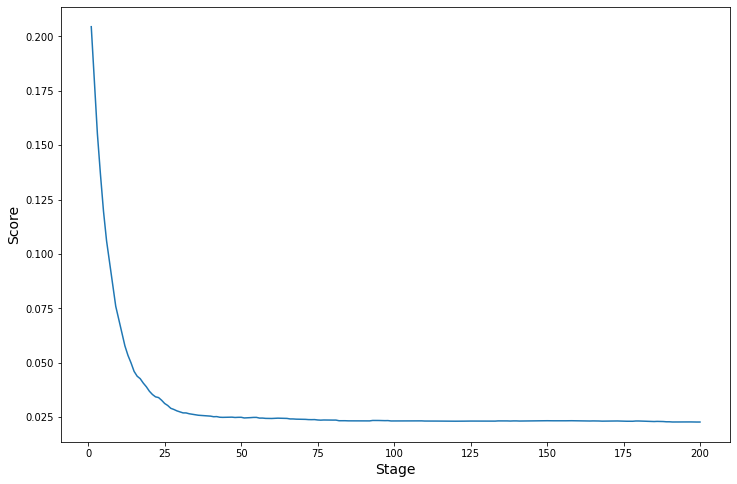

In [62]:
test_score = np.zeros(num_iterations, dtype=np.float64)
for i, y_pred_n in enumerate(cat_reg_n.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred_n)

fig = plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, num_iterations+1), test_score)
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

_Видно, что после 50 шага ошибка перестаёт меняться. Стоит отметить, что очень большое число шагов брать нехорошо, поскольку бустинг (в отличие от случайного леса, который крайне редко переобучается) может переобучиться._

In [16]:
dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)

param = [('max_depth', 5), ('objective', 'binary:logistic'), ('eval_metric', 'logloss'), ('eval_metric', 'error')]
 
num_round = 100
watchlist = [(dtest,'eval'), (dtrain,'train')]

evals_result = {}
bst = xgboost.train(param, dtrain, num_round, watchlist, evals_result=evals_result);

[0]	eval-logloss:0.474968	eval-error:0.052632	train-logloss:0.465832	train-error:0.029297
[1]	eval-logloss:0.347637	eval-error:0.035088	train-logloss:0.331416	train-error:0.011719
[2]	eval-logloss:0.265375	eval-error:0.017544	train-logloss:0.245621	train-error:0.009766
[3]	eval-logloss:0.219378	eval-error:0.035088	train-logloss:0.188135	train-error:0.005859
[4]	eval-logloss:0.182676	eval-error:0.017544	train-logloss:0.145947	train-error:0.003906
[5]	eval-logloss:0.152385	eval-error:0.017544	train-logloss:0.115556	train-error:0.003906
[6]	eval-logloss:0.130075	eval-error:0.017544	train-logloss:0.092613	train-error:0.003906
[7]	eval-logloss:0.118909	eval-error:0.017544	train-logloss:0.076243	train-error:0.003906
[8]	eval-logloss:0.102378	eval-error:0.017544	train-logloss:0.062595	train-error:0.001953
[9]	eval-logloss:0.094892	eval-error:0.017544	train-logloss:0.051695	train-error:0.001953
[10]	eval-logloss:0.087963	eval-error:0.017544	train-logloss:0.043517	train-error:0.001953
[11]	eval

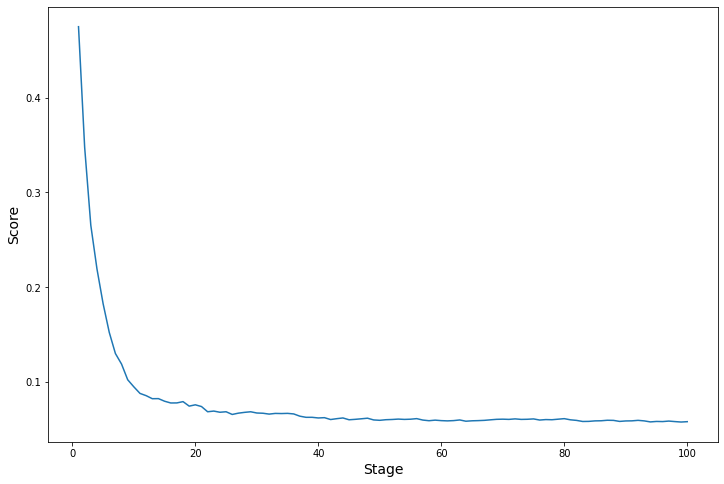

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, num_round+1), evals_result['eval']['logloss'])
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

_Отметим, что loss монотонно уменьшается (и после сотни приближений ошибка уже не меняется, достигнут некоторый минимум)._

Определите важность признаков используя Gini impurity и SHAP

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.9 MB/s 


_Для визуализации gini inpurity обучим случайный лес и посмотрим на его feature-importances:_

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rf_cl = RandomForestClassifier(criterion='gini', random_state=0)
params = {'n_estimators': np.arange(50, 160, 10), 'max_depth': np.arange(5, 16, 1), 'min_samples_split': np.arange(2, 11)}
rand_gs = RandomizedSearchCV(rf_cl, params, random_state=0, cv=5)
search = rand_gs.fit(X_train, y_train)
search.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 11}

In [67]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=100, max_depth=11, min_samples_split=2, criterion='gini', random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.97      0.91      0.94        35

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



_Случайный лес с оптимальными параметрами даёт неплохие результаты по classification-report._

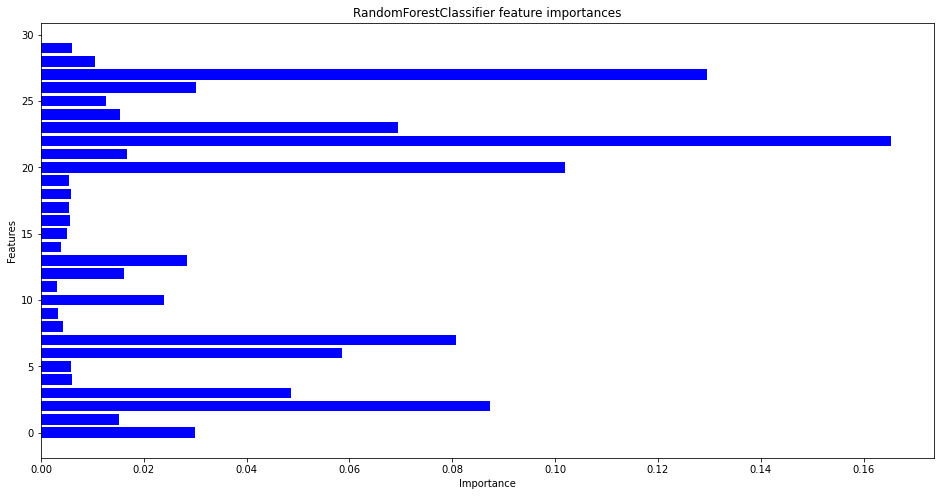

In [68]:
plt.figure(figsize=(16, 8))
plt.barh(np.arange(30), rf.feature_importances_, color='blue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("RandomForestClassifier feature importances")
plt.show()

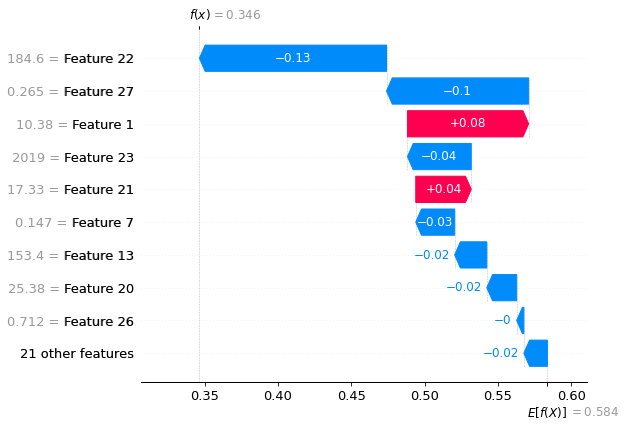

In [69]:
explainer = shap.Explainer(xg_reg)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

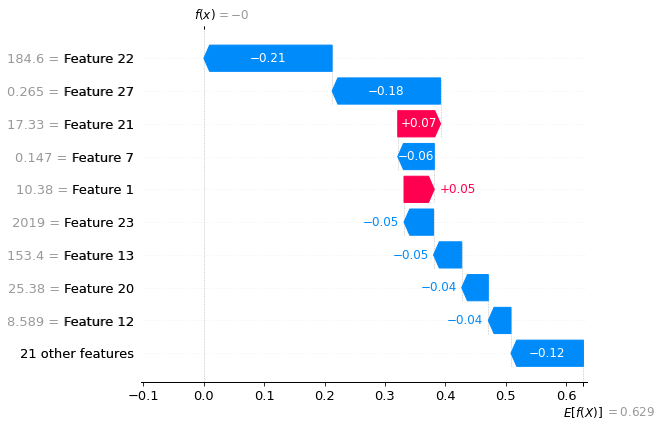

In [70]:
shap.plots.waterfall(shap.Explainer(lgg_reg)(X)[0])

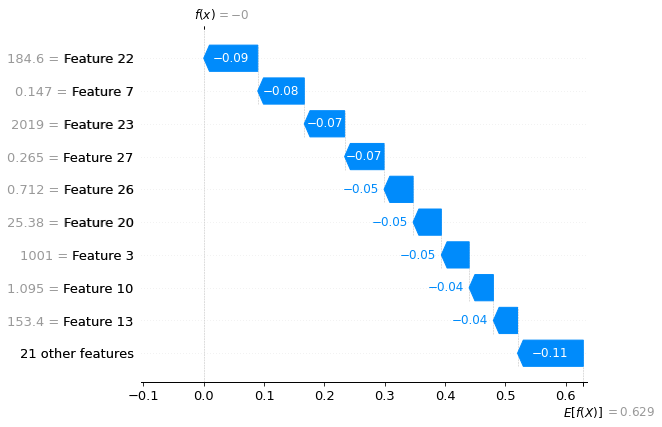

In [71]:
shap.plots.waterfall(shap.Explainer(cat_reg)(X)[0])

_Исследуем зависимость от количество эстиматоров для всех 4 бустингов(остальные параметры положим стандартными):_

In [6]:
import tqdm as tqdm

In [10]:
random_state = 0
test_scores_reg, test_scores_xg, test_scores_lgg, test_scores_cat,  = np.array([]), np.array([]), np.array([]), np.array([])
estimators_grid = np.arange(5, 55, 5)

for n_estimator in tqdm.tqdm(estimators_grid):
    reg = GradientBoostingRegressor(n_estimators=n_estimator, random_state=random_state).fit(X_train, y_train)
    xg_reg = xgboost.XGBRegressor(n_estimators=n_estimator, random_state=random_state).fit(X_train, y_train)
    lgg_reg = lightgbm.LGBMRegressor(n_estimators=n_estimator, random_state=random_state).fit(X_train, y_train)
    cat_reg = catboost.CatBoostRegressor(iterations=n_estimator, random_state=random_state, verbose=0).fit(X_train, y_train)

    test_scores_reg = np.append(test_scores_reg, mse(y_test, reg.predict(X_test)))
    test_scores_xg = np.append(test_scores_xg, mse(y_test, xg_reg.predict(X_test)))
    test_scores_lgg = np.append(test_scores_lgg, mse(y_test, lgg_reg.predict(X_test)))
    test_scores_cat = np.append(test_scores_cat, mse(y_test, cat_reg.predict(X_test)))


  0%|          | 0/10 [00:00<?, ?it/s]

[15:02:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 10%|█         | 1/10 [00:00<00:03,  2.29it/s]

[15:02:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 20%|██        | 2/10 [00:00<00:02,  2.99it/s]

[15:02:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 30%|███       | 3/10 [00:01<00:02,  2.81it/s]

[15:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 40%|████      | 4/10 [00:01<00:02,  2.36it/s]

[15:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 50%|█████     | 5/10 [00:01<00:01,  2.59it/s]

[15:02:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 60%|██████    | 6/10 [00:02<00:01,  2.62it/s]

[15:02:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 70%|███████   | 7/10 [00:02<00:01,  2.55it/s]

[15:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 80%|████████  | 8/10 [00:03<00:00,  2.39it/s]

[15:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 90%|█████████ | 9/10 [00:03<00:00,  2.03it/s]

[15:02:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


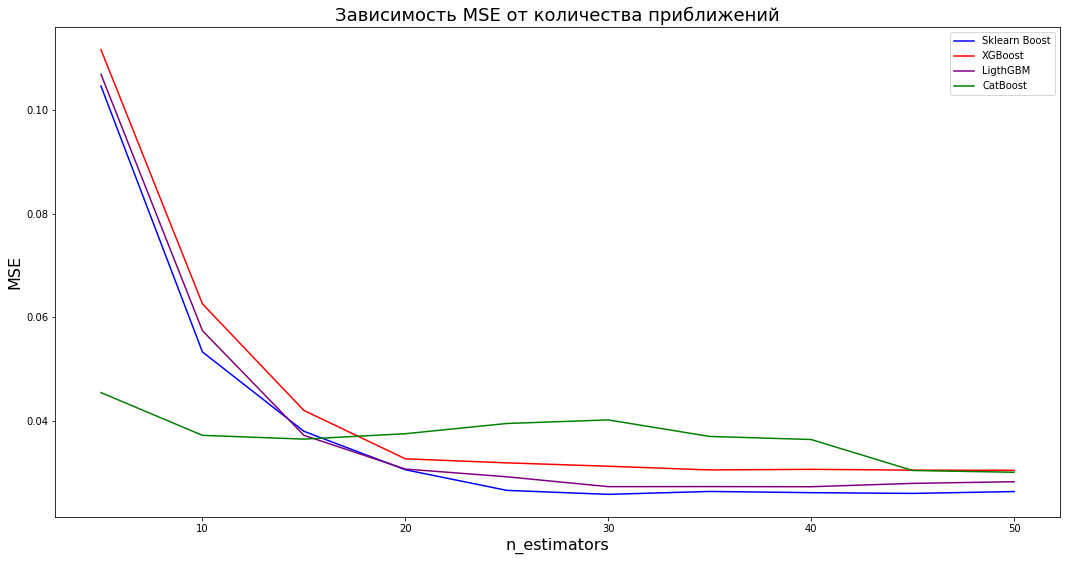

In [11]:
plt.figure(figsize=(18, 9))
plt.plot(estimators_grid, test_scores_reg, color='blue', label='Sklearn Boost')
plt.plot(estimators_grid, test_scores_xg, color='red', label='XGBoost')
plt.plot(estimators_grid, test_scores_lgg, color='purple', label='LigthGBM')
plt.plot(estimators_grid, test_scores_cat, color='green', label='CatBoost')
plt.xlabel('n_estimators', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('Зависимость MSE от количества приближений', fontsize=18)
plt.legend()
plt.show()

_Исследуем зависимость глубины для всех 4 бустингов(остальные параметры положим стандартными):_

In [44]:
random_state = 0
test_scores_reg, test_scores_xg, test_scores_lgg, test_scores_cat,  = np.array([]), np.array([]), np.array([]), np.array([])
max_depth_grid = np.arange(3, 12, 1)
for depth in tqdm.tqdm(max_depth_grid):
    reg = GradientBoostingRegressor(max_depth=depth, random_state=random_state).fit(X_train, y_train)
    xg_reg = xgboost.XGBRegressor(max_depth=depth, random_state=random_state).fit(X_train, y_train)
    lgg_reg = lightgbm.LGBMRegressor(max_depth=depth, random_state=random_state).fit(X_train, y_train)
    cat_reg = catboost.CatBoostRegressor(depth=depth, random_state=random_state, verbose=0).fit(X_train, y_train)

    test_scores_reg = np.append(test_scores_reg, mse(y_test, reg.predict(X_test)))
    test_scores_xg = np.append(test_scores_xg, mse(y_test, xg_reg.predict(X_test)))
    test_scores_lgg = np.append(test_scores_lgg, mse(y_test, lgg_reg.predict(X_test)))
    test_scores_cat = np.append(test_scores_cat, mse(y_test, cat_reg.predict(X_test)))

  0%|          | 0/9 [00:00<?, ?it/s]

[14:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 11%|█         | 1/9 [00:02<00:23,  2.96s/it]

[14:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 22%|██▏       | 2/9 [00:06<00:24,  3.48s/it]

[14:51:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 33%|███▎      | 3/9 [00:11<00:24,  4.13s/it]

[14:51:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 44%|████▍     | 4/9 [00:18<00:25,  5.03s/it]

[14:51:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 56%|█████▌    | 5/9 [00:26<00:25,  6.37s/it]

[14:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 67%|██████▋   | 6/9 [00:39<00:25,  8.50s/it]

[14:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 78%|███████▊  | 7/9 [01:01<00:25, 12.77s/it]

[14:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 89%|████████▉ | 8/9 [01:34<00:19, 19.47s/it]

[14:53:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 9/9 [02:33<00:00, 17.05s/it]


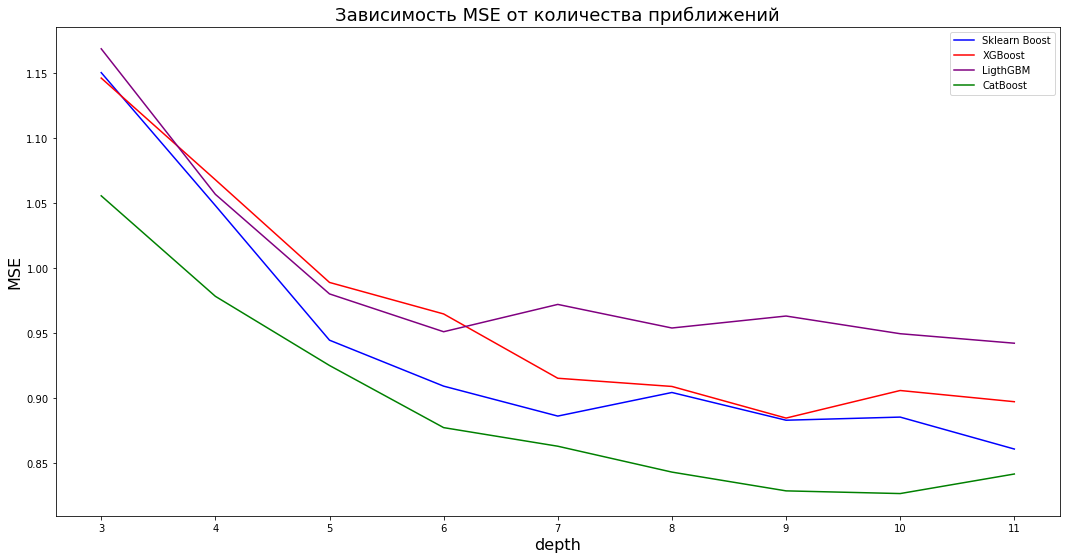

In [45]:
plt.figure(figsize=(18, 9))
plt.plot(max_depth_grid, test_scores_reg, color='blue', label='Sklearn Boost')
plt.plot(max_depth_grid, test_scores_xg, color='red', label='XGBoost')
plt.plot(max_depth_grid, test_scores_lgg, color='purple', label='LigthGBM')
plt.plot(max_depth_grid, test_scores_cat, color='green', label='CatBoost')
plt.xlabel('depth', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('Зависимость MSE от количества приближений', fontsize=18)
plt.legend()
plt.show()

_Видно, что для грамотного использования XGBoost, LightLGB и CatBoost нам недостаточно использовать только 1 параметр, поскольку в данном случае видно, что бустинг из sklearn работает не хуже 3 моделей из перечисленных выше библиотек._

**Вывод:** _Были рассмотрены различные зависимости для разных типов градиентного бустинга, а также получены карты для значимостей признаков. По последним можно понять, что в обучении главными являются совершенно определённые признаки (в нашем случае это признаки 22, 23, 27, например, они вносят большой вклад что по gini importancy, что по shap'ам для всех моделей), также необходимо подбирать параметры для различных бустингов отдельно и пользоваться их преимуществами - например,  lightlgb хорошо распараллеливается, catboost учитывает категориальные признаки (но при этом учится дольше) и так далее._

#Упражнение 2

В данном упражнении вам нужно будет оценить важность функциональный групп во взаимодействиях с заданным белком

Загрузите датасет

In [23]:
!wget https://zenodo.org/record/3362353/files/activity_classes_ChEMBL24.dat?download=1

--2022-11-22 14:07:06--  https://zenodo.org/record/3362353/files/activity_classes_ChEMBL24.dat?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540839 (528K) [application/octet-stream]
Saving to: ‘activity_classes_ChEMBL24.dat?download=1’

activity_classes_Ch 100%[===================>] 528.16K   374KB/s    in 1.4s    

2022-11-22 14:07:09 (374 KB/s) - ‘activity_classes_ChEMBL24.dat?download=1’ saved [540839/540839]



In [24]:
!cat 'activity_classes_ChEMBL24.dat?download=1'

Выходные данные были обрезаны до нескольких последних строк (5000).
CHEMBL233	Mu opioid receptor	CCC(C)NC(=O)N(CCN1C2CCC1CC(C2)c3cccc(c3)C(=O)N)CC4CCCCC4	18511	8
CHEMBL233	Mu opioid receptor	CCC(C)NC(=O)N(CCN1C2CCC1CC(C2)c3cccc(c3)O)CC4CCCCC4	9598	8
CHEMBL233	Mu opioid receptor	CCC(CC)C(=O)N(CCN1C2CCC1CC(C2)c3cccc(c3)O)Cc4ccccc4	10414	8
CHEMBL233	Mu opioid receptor	CCC(CC)C(=O)N(Cc1ccccc1)C(C)CN2C3CCC2CC(C3)c4cccc(c4)O	7001	8
CHEMBL233	Mu opioid receptor	CCC(CC)CN1CCCc2cc(ccc2C1)Oc3ccc(cn3)C(=O)N	23357	7.38
CHEMBL233	Mu opioid receptor	CCC1(C(=O)Nc2ccccc2N(C1=O)C3CCN(CC3)C4CCC(CC4)C(C)C)CC	733	5.3
CHEMBL233	Mu opioid receptor	CCC1(C(=O)Nc2ccccc2N(C1=O)C3CCN(CC3)C4CCCCCCC4)CC	733	5.21
CHEMBL233	Mu opioid receptor	CCC12CCN(CC1Oc3c2cc(cc3)O)CC4CC4	3666	8.4
CHEMBL233	Mu opioid receptor	CCC1C2CCCC3C2C(CCN3CC4CCCCC4)CC1=O	2217	5.72
CHEMBL233	Mu opioid receptor	CCC1C2CCCC3C2C(CCN3Cc4cccs4)CC1=O	2217	6.05
CHEMBL233	Mu opioid receptor	CCC1CC(C(CN1CCc2ccccc2)C)(C)c3cccc(c3)O	405	7.12
CHEMBL233	M

Обработайте датасет и разделите его на тестовую выборку

In [25]:
activity_classes = []

with open('activity_classes_ChEMBL24.dat?download=1') as rf:
  for l in rf.readlines():
    line = [s.strip() for s in l.split('\t')]
    activity_classes.append(line)
import pandas as pd

df = pd.DataFrame(activity_classes)
df.columns = ['TargetID', 'TargetName', 'SMILES', 'AnalogSeriesID', 'pKi']
df = df.drop(df.index[0])
df

,TargetID,TargetName,SMILES,AnalogSeriesID,pKi
1,CHEMBL233,Mu opioid receptor,C#CCN1CCC23CCCCC2C1Cc4c3cc(cc4)O,1039,11.52
2,CHEMBL233,Mu opioid receptor,C#CCN1CN(C2(C1=O)CCN(CC2)C(c3ccccc3)c4ccccc4)c...,24317,5.37
3,CHEMBL233,Mu opioid receptor,CC(=NC(CO)C(=NCC1CC23CCC1(C4C25CCN(C3Cc6c5c(c(...,23111,8.23
4,CHEMBL233,Mu opioid receptor,CC(=NC(Cc1ccccc1)C(=NCC2CC34CCC2(C5C36CCN(C4Cc...,23111,9.44
5,CHEMBL233,Mu opioid receptor,CC(=O)CN1CN(C2(C1=O)CCN(CC2)C3CCC(c4c3cccc4)(C...,10988,7.85
...,...,...,...,...,...
5293,CHEMBL4792,Orexin receptor 2,c1ccc(c(c1)c2ncccn2)C(=O)N3C4CCC3C(C4)Nc5cnc(c...,6612,6.24
5294,CHEMBL4792,Orexin receptor 2,c1ccc(cc1)C2(CC2C(=O)Nc3ccccn3)COc4ccccc4,4774,6.01
5295,CHEMBL4792,Orexin receptor 2,c1ccc(cc1)CN2C(=O)CCCC23CCN(CC3)c4cnc5ccccc5n4,21610,6.51
5296,CHEMBL4792,Orexin receptor 2,c1ccc(cc1)CN2CCCC3(C2=O)CCN(CC3)c4[nH]c5ccccc5n4,15031,5.97


Установим rdkit, он вам пригодится.

In [26]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.4 MB/s 


In [27]:
import rdkit
from rdkit import Chem 
from rdkit.Chem import Descriptors

Вытянем из последовательностей смайлз признаки.

In [28]:
def get_mol_features(s):
  mol = Chem.MolFromSmiles(s)

  tpsa = Descriptors.TPSA(mol)
  logp = Descriptors.MolLogP(mol)
  wt = Descriptors.ExactMolWt(mol)
  ch = Descriptors.MaxPartialCharge(mol)
  rad_e = Descriptors.NumRadicalElectrons(mol)
  val_e = Descriptors.NumValenceElectrons(mol)
  h_acc = Descriptors.NumHAcceptors(mol)
  h_don = Descriptors.NumHDonors(mol)
  ar_r = Descriptors.NumAromaticRings(mol)
  bal = Descriptors.BalabanJ(mol)
  ipc = Descriptors.Ipc(mol)
  nhoh = Descriptors.NHOHCount(mol)
  no = Descriptors.NOCount(mol)
  hka = Descriptors.HallKierAlpha(mol)
  lab = Descriptors.LabuteASA(mol)
  csp = Descriptors.FractionCSP3(mol)
  return tpsa, logp, wt, ch, rad_e, val_e, h_acc, h_don, ar_r, bal, ipc, nhoh, no, hka, lab, csp

In [29]:
features = []
smiles = df['SMILES']

for s in smiles:
  features.append(get_mol_features(s))

data = pd.DataFrame(features)
data.columns = ['tpsa', 'logp', 'wt', 'ch', 'rad_e', 'val_e', 'h_acc', 'h_don', 'ar_r', 'bal', 'ipc', 'nhoh', 'no', 'hka', 'lab', 'csp']
data['pKi'] = df['pKi'].values.astype(float)
data['smiles'] = df['SMILES'].values

Посмотрите что у вас получилось в data

In [30]:
from sklearn.preprocessing import StandardScaler

X, y = data.iloc[:, :-2], data['pKi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X.head(5)

,tpsa,logp,wt,ch,rad_e,val_e,h_acc,h_don,ar_r,bal,ipc,nhoh,no,hka,lab,csp
0,23.47,3.0838,281.177964,0.115392,0,110,2,1,1,1.836345,1.025361e+05,1,2,-1.46,126.711450,0.578947
1,26.79,4.5501,435.231063,0.250316,0,166,3,0,3,1.450942,6.274912e+07,0,4,-3.55,195.988541,0.275862
2,127.34,2.9105,525.283886,0.208412,0,206,7,4,1,1.328729,7.846528e+08,4,9,-2.36,222.744589,0.724138
3,107.11,5.1609,585.320271,0.206329,0,228,6,3,2,1.179414,1.219886e+10,3,8,-3.10,253.007449,0.600000
4,43.86,4.5290,445.272927,0.249930,0,174,4,0,2,1.410006,3.667707e+07,0,5,-2.66,196.912623,0.500000


Вфберите две модели, которые вам понравились из первого задания, обучите и проанализиуйте в SHAP

_Рассмотрим все 3 модели:_

In [33]:
xg_reg = xgboost.XGBRegressor(learning_rate = 0.1, max_depth = 5, alpha = 10, min_child_weight=9, n_estimators = 10).fit(X_train, y_train)
lgg_reg = lightgbm.LGBMRegressor(n_estimators=2000, learning_rate=0.1, max_depth=-1, num_leaves=100, min_child_weight=7, n_jobs=-1).fit(X_train, y_train)
cat_reg = catboost.CatBoostRegressor(iterations=2000, learning_rate=0.1, depth=6, min_data_in_leaf=7, verbose=0).fit(X_train, y_train)

[14:08:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


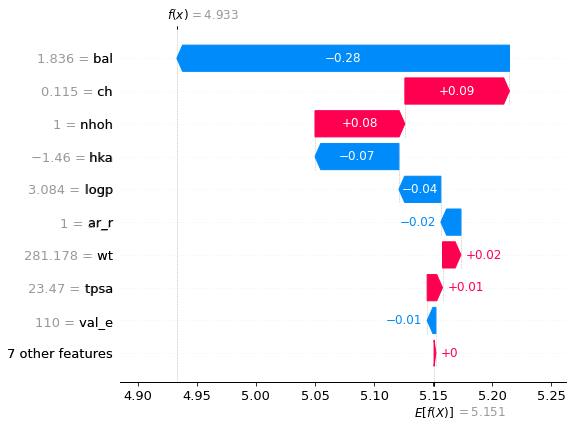

In [34]:
explainer = shap.Explainer(xg_reg)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

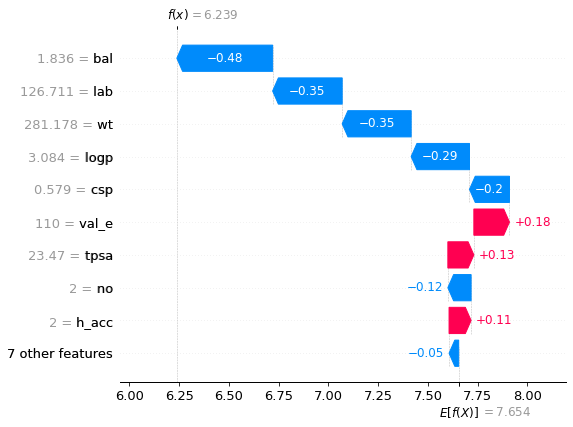

In [36]:
shap.plots.waterfall(shap.Explainer(lgg_reg)(X)[0])

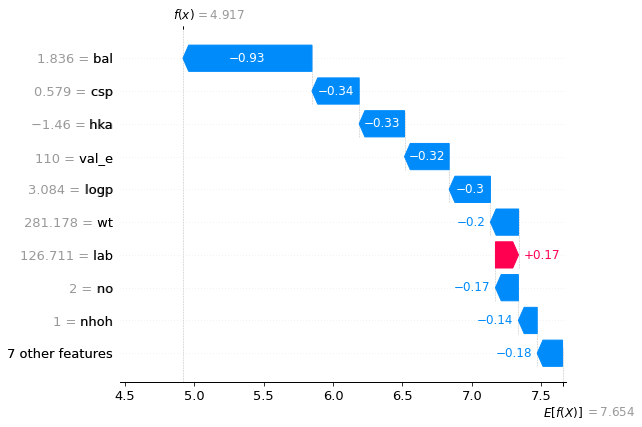

In [35]:
shap.plots.waterfall(shap.Explainer(cat_reg)(X)[0])

Сделайте выводы, есть ли разница между выбранными вами моделями. Какие параметры оказались важными.

**Вывод:** _Были выбраны модели xgboost, lgb и catboost с предложенными параметрами, стоит отметить, что на модели lgb дольше считаются shap'ы (у меня нет чёткой причины, почему так происходит). Результат следующий: главный признак обучения всех моделей - это коэф-т Balaban-J (bal), а также значимыми оказались (на 3 моделях) признаки wt и logp (при этом для lgb и catboost смещение гораздо значительнее). При этом признаки lab и scp (значимые для lgb и catboost) вообще не фигурируют в shap'е для xg-boost.  
Итак, значимость признаков не зависит от выбранной модели (в любом случае они получаются схожими)._